In [2]:
from google.colab import drive
import os
import zipfile
import shutil

drive.mount('/content/drive')

zip_path = '/content/drive/MyDrive/Dicoding/dataset-img/Archive.zip'
dataset_path = '/content/dataset/'
resized_dataset_path = '/content/dataset_resized_128x128/'  # Path dataset yang diresize

# 🔥 Hapus dataset hasil resize jika sudah ada sebelumnya
if os.path.exists(resized_dataset_path):
    shutil.rmtree(resized_dataset_path)  # Hapus folder dan isinya
    print(f"🔥 Folder {resized_dataset_path} telah dihapus untuk memastikan clean start.")

# 🔥 Hapus dataset lama jika ada
if os.path.exists(dataset_path):
    shutil.rmtree(dataset_path)  # Hapus folder dan isinya
    print(f"🔥 Folder {dataset_path} telah dihapus untuk memastikan clean start.")

# ✅ Ekstrak dataset baru
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_path)

# 🔥 Hapus folder yang tidak diinginkan (misalnya, __MACOSX atau folder _resized_)
unwanted_folders = ['__MACOSX'] + [f for f in os.listdir(dataset_path) if f.startswith('_resized_')]

for folder in unwanted_folders:
    folder_path = os.path.join(dataset_path, folder)
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)  # Hapus folder dan isinya
        print(f"🔥 Folder {folder} telah dihapus.")

# ✅ Cek hasil akhir
print("✅ Dataset berhasil diekstrak ke:", dataset_path)
print("📂 Daftar folder dalam dataset setelah pembersihan:", os.listdir(dataset_path))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🔥 Folder /content/dataset_resized_128x128/ telah dihapus untuk memastikan clean start.
🔥 Folder /content/dataset/ telah dihapus untuk memastikan clean start.
🔥 Folder __MACOSX telah dihapus.
✅ Dataset berhasil diekstrak ke: /content/dataset/
📂 Daftar folder dalam dataset setelah pembersihan: ['flowers', 'dogs', 'horses', 'human', 'cats']


In [3]:
# Dictionary untuk menyimpan jumlah gambar per kategori
class_counts = {}

# Loop ke setiap folder dalam dataset
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)

    # Pastikan hanya membaca folder
    if os.path.isdir(category_path):
        num_files = len(os.listdir(category_path))  # Hitung jumlah file dalam kategori ini
        class_counts[category] = num_files

# Menampilkan hasil
total_images = sum(class_counts.values())  # Total semua gambar

print("Jumlah gambar per kategori:")
for category, count in class_counts.items():
    print(f"{category}: {count} images")

print(f"\nTotal jumlah gambar dalam dataset: {total_images} images")

Jumlah gambar per kategori:
flowers: 210 images
dogs: 202 images
horses: 202 images
human: 202 images
cats: 202 images

Total jumlah gambar dalam dataset: 1018 images


In [5]:
import cv2
import os

# Tentukan ukuran target untuk resize
target_size = (128, 128)  # (width, height)

# Pastikan dataset_path tidak memiliki slash di akhir
dataset_path = dataset_path.rstrip('/')  # Hapus "/" jika ada di akhir path

# Buat path folder untuk hasil resize
resized_dir = os.path.join(os.path.dirname(dataset_path), f"{os.path.basename(dataset_path)}_resized_{target_size[0]}x{target_size[1]}")

# Buat folder utama untuk dataset yang sudah diresize
os.makedirs(resized_dir, exist_ok=True)

# Loop setiap kategori gambar
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)

    # Cek apakah ini folder kategori
    if os.path.isdir(category_path):
        save_category_path = os.path.join(resized_dir, category)
        os.makedirs(save_category_path, exist_ok=True)  # Buat folder kategori jika belum ada

        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)  # Baca gambar

            if img is not None:
                img_resized = cv2.resize(img, target_size)  # Resize
                save_path = os.path.join(save_category_path, img_name)
                cv2.imwrite(save_path, img_resized)  # Simpan gambar yang sudah diresize

print(f"✅ Dataset berhasil diresize ke {target_size} dan disimpan di {resized_dir}")

✅ Dataset berhasil diresize ke (128, 128) dan disimpan di /content/dataset_resized_128x128


In [6]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Path dataset yang telah diresize
resized_dataset_path = "/content/dataset_resized_128x128"

# Path folder untuk train, validation, dan test
split_base_dir = "/content/dataset_split"
train_dir = os.path.join(split_base_dir, "train")
val_dir = os.path.join(split_base_dir, "val")
test_dir = os.path.join(split_base_dir, "test")

# Hapus folder sebelumnya jika ada (untuk clean start)
if os.path.exists(split_base_dir):
    shutil.rmtree(split_base_dir)
    print(f"🔥 Folder {split_base_dir} telah dihapus untuk memastikan clean start.")

# Buat folder utama untuk train, val, test
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Rasio pembagian dataset
train_ratio = 0.8   # 80% untuk training
val_ratio = 0.1     # 10% untuk validation
test_ratio = 0.1    # 10% untuk testing

# Loop setiap kategori
for category in os.listdir(resized_dataset_path):
    category_path = os.path.join(resized_dataset_path, category)

    # Pastikan hanya membaca folder kategori
    if os.path.isdir(category_path):
        images = os.listdir(category_path)
        random.shuffle(images)  # Acak urutan gambar

        # Hitung jumlah gambar untuk setiap set
        train_count = int(len(images) * train_ratio)
        val_count = int(len(images) * val_ratio)

        # Pisahkan dataset
        train_images = images[:train_count]
        val_images = images[train_count:train_count + val_count]
        test_images = images[train_count + val_count:]

        # Buat folder kategori di dalam train, val, test
        os.makedirs(os.path.join(train_dir, category), exist_ok=True)
        os.makedirs(os.path.join(val_dir, category), exist_ok=True)
        os.makedirs(os.path.join(test_dir, category), exist_ok=True)

        # Copy gambar ke folder masing-masing
        for img_name in train_images:
            shutil.copy(os.path.join(category_path, img_name), os.path.join(train_dir, category, img_name))

        for img_name in val_images:
            shutil.copy(os.path.join(category_path, img_name), os.path.join(val_dir, category, img_name))

        for img_name in test_images:
            shutil.copy(os.path.join(category_path, img_name), os.path.join(test_dir, category, img_name))

        print(f"✅ Kategori {category}: {len(train_images)} train, {len(val_images)} val, {len(test_images)} test")

print("\n✅ Dataset berhasil dibagi menjadi Train, Validation, dan Test Set!")
print("📂 Struktur folder setelah pembagian dataset:")
for split in ["train", "val", "test"]:
    split_path = os.path.join(split_base_dir, split)
    print(f"\n📁 {split.upper()} Set:")
    for category in os.listdir(split_path):
        category_path = os.path.join(split_path, category)
        num_files = len(os.listdir(category_path))
        print(f"  - {category}: {num_files} images")

🔥 Folder /content/dataset_split telah dihapus untuk memastikan clean start.
✅ Kategori flowers: 168 train, 21 val, 21 test
✅ Kategori dogs: 161 train, 20 val, 21 test
✅ Kategori horses: 161 train, 20 val, 21 test
✅ Kategori human: 161 train, 20 val, 21 test
✅ Kategori cats: 161 train, 20 val, 21 test

✅ Dataset berhasil dibagi menjadi Train, Validation, dan Test Set!
📂 Struktur folder setelah pembagian dataset:

📁 TRAIN Set:
  - flowers: 168 images
  - dogs: 161 images
  - horses: 161 images
  - human: 161 images
  - cats: 161 images

📁 VAL Set:
  - flowers: 21 images
  - dogs: 20 images
  - horses: 20 images
  - human: 20 images
  - cats: 20 images

📁 TEST Set:
  - flowers: 21 images
  - dogs: 21 images
  - horses: 21 images
  - human: 21 images
  - cats: 21 images


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os

In [8]:
# Path ke dataset yang sudah dibagi
dataset_split_path = "/content/dataset_split"

train_dir = os.path.join(dataset_split_path, "train")
val_dir = os.path.join(dataset_split_path, "val")
test_dir = os.path.join(dataset_split_path, "test")

# Hyperparameters
img_size = (128, 128)  # Ukuran input gambar
batch_size = 32
learning_rate = 0.001

In [9]:
# Data Augmentation untuk Train Set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Normalisasi untuk Validation & Test Set (tanpa augmentasi)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load Data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 812 images belonging to 5 classes.
Found 101 images belonging to 5 classes.
Found 105 images belonging to 5 classes.


In [10]:
model = Sequential([
    # Layer Convolution 1
    Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Layer Convolution 2
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),

    # Layer Convolution 3
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),

    # Flattening
    Flatten(),

    # Fully Connected Layer 1 (Dense)
    Dense(128, activation="relu"),
    Dropout(0.5),  # Mencegah overfitting

    # Fully Connected Layer 2 (Output)
    Dense(5, activation="softmax")  # 5 kelas (flowers, dogs, horses, human, cats)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Print Summary Model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.2336 - loss: 1.7188 - val_accuracy: 0.3465 - val_loss: 1.4873
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.3885 - loss: 1.4327 - val_accuracy: 0.4158 - val_loss: 1.3966
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.4189 - loss: 1.3774 - val_accuracy: 0.4653 - val_loss: 1.2528
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.4811 - loss: 1.2506 - val_accuracy: 0.5446 - val_loss: 1.1014
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5013 - loss: 1.1750 - val_accuracy: 0.4950 - val_loss: 1.1250
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.5338 - loss: 1.1444 - val_accuracy: 0.5743 - val_loss: 1.0283
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.5569 - loss: 1.1079 - val_accuracy: 0.5644 - val_loss: 0.9734
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5729 - loss: 1.0208 - val_accuracy: 0.5941 - val_loss:

In [13]:
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f"🔥 Test Accuracy: {test_acc*100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step - accuracy: 0.8057 - loss: 0.5327
🔥 Test Accuracy: 81.90%


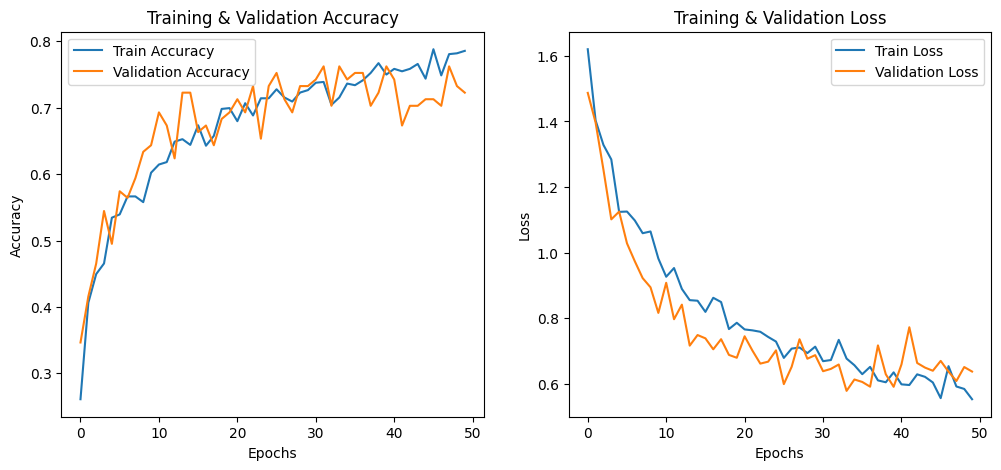

In [14]:
import matplotlib.pyplot as plt

# Plot Accuracy & Loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training & Validation Accuracy")

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training & Validation Loss")

plt.show()

In [16]:
import tensorflow as tf
import os
!pip install tensorflowjs
import tensorflowjs as tfjs

In [17]:
# Buat struktur direktori yang sesuai
submission_dir = "/content/submission"
tfjs_dir = os.path.join(submission_dir, "tfjs_model")
tflite_dir = os.path.join(submission_dir, "tflite")
saved_model_dir = os.path.join(submission_dir, "saved_model")

# Pastikan semua folder dibuat
os.makedirs(submission_dir, exist_ok=True)
os.makedirs(tfjs_dir, exist_ok=True)
os.makedirs(tflite_dir, exist_ok=True)
os.makedirs(saved_model_dir, exist_ok=True)

# ✅ Simpan model dalam format SavedModel menggunakan export
model.export(saved_model_dir)
print(f"Model exported to {saved_model_dir} in SavedModel format")

# ✅ Simpan dalam format TF-Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
tflite_path = os.path.join(tflite_dir, "model.tflite")
with open(tflite_path, "wb") as f:
    f.write(tflite_model)
print(f"Model saved to {tflite_path} in TFLite format")

# Buat file label.txt untuk TFLite
label_path = os.path.join(tflite_dir, "label.txt")
with open(label_path, "w") as f:
    f.write("\n".join(["flowers", "dogs", "horses", "human", "cats"]))
print(f"Labels saved to {label_path}")

# ✅ Simpan dalam format TensorFlow.js
tfjs.converters.save_keras_model(model, tfjs_dir)
print(f"Model saved to {tfjs_dir} in TensorFlow.js format")

print("✅ Model berhasil disimpan dalam format SavedModel, TF-Lite, dan TFJS di dalam folder 'submission'.")

Saved artifact at '/content/submission/saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor_14')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  136962549840208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136962549837328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136962549840592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136962549835600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136962549837520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136962549836176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136962549835408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136962549834064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136962549836368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136962549835024: TensorSpec(shape=(), dtype=tf.resource, name=None

Model saved to /content/submission/tflite/model.tflite in TFLite format
Labels saved to /content/submission/tflite/label.txt
failed to lookup keras version from the file,
    this is likely a weight only file
Model saved to /content/submission/tfjs_model in TensorFlow.js format
✅ Model berhasil disimpan dalam format SavedModel, TF-Lite, dan TFJS di dalam folder 'submission'.
